# Accessing Oahu Stream Data through USGS API 

Quick examination regarding data capture availability from USGS sites for Oahu. 

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from climata.usgs import DailyValueIO
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import numpy as np

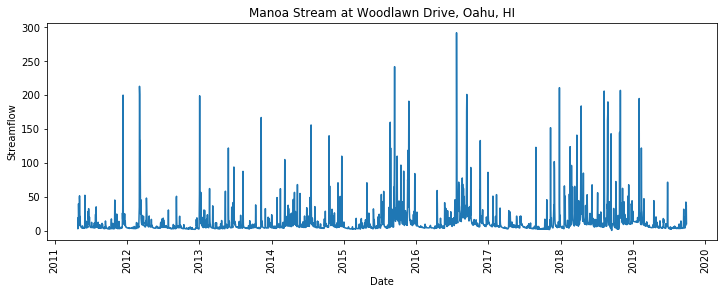

In [53]:
# set parameters
nyears = 20
ndays = 365 * nyears
station_id = "16241600"
param_id = "00060"

datelist = pd.date_range(end=pd.datetime.today(), periods=ndays).tolist()
data = DailyValueIO(
    start_date=datelist[0],
    end_date=datelist[-1],
    station=station_id,
    parameter=param_id,)

# create lists of date-flow values
for series in data:
    flow = [r[1] for r in series.data]
    dates = [r[0] for r in series.data]
    
# create pandas dataframe of data
data_df = pd.DataFrame({"date":dates, "Flow_CFS_maybe":flow})
    
fig, ax, = plt.subplots(figsize = (12, 4))
plt.plot(dates, flow)
plt.xlabel('Date')
plt.ylabel('Streamflow')
plt.title(series.site_name)
plt.xticks(rotation='vertical')
plt.show()



In [56]:
data_df

,date,Flow_CFS_maybe
0,2011-04-28,3.26
1,2011-04-29,19.00
2,2011-04-30,3.50
3,2011-05-01,6.03
4,2011-05-02,39.80
...,...,...
3070,2019-09-25,15.30
3071,2019-09-26,42.30
3072,2019-09-27,12.60
3073,2019-09-28,37.60


# Download all stream series in Honolulu County

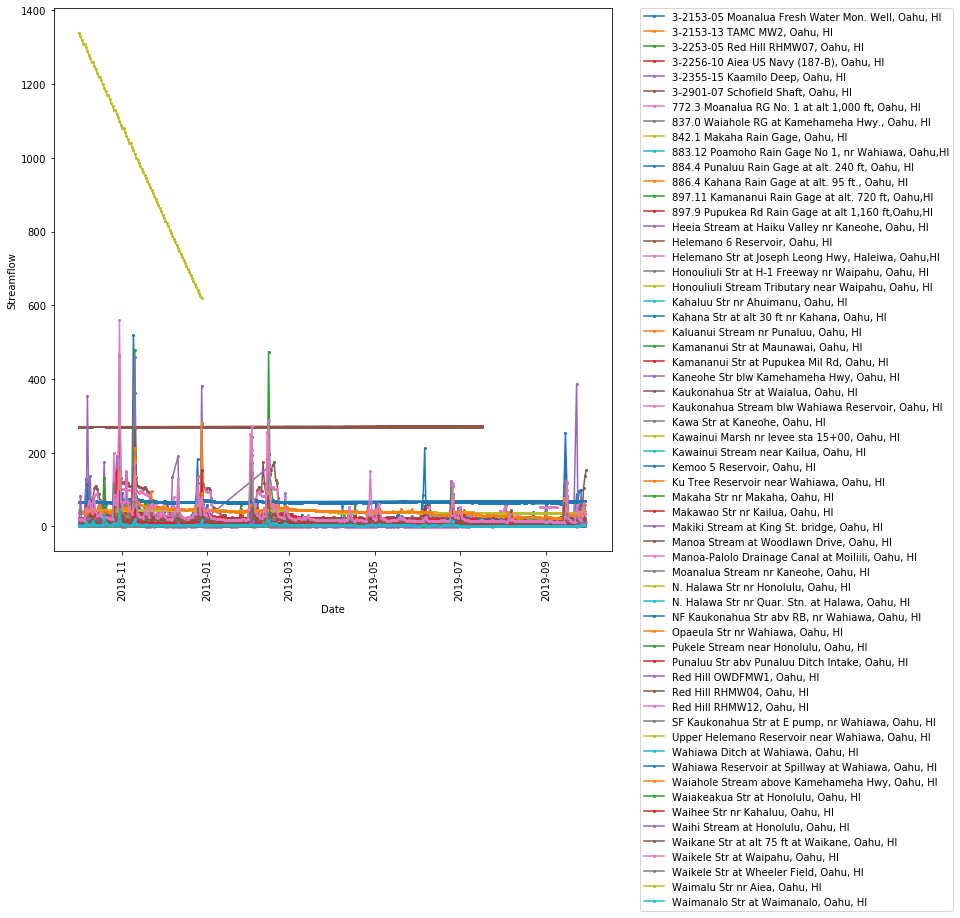

In [68]:
# set parameters
nyears = 1
ndays = 365 * nyears
county = "15003"
datelist = pd.date_range(end=pd.datetime.today(), periods=ndays).tolist()

data = DailyValueIO(
    start_date=datelist[0],
    end_date=datelist[-1],
    county=county)

date = []; value = []

for series in data:
    for row in series.data:
        date.append(row[0])
        value.append(row[1])
site_names = [[series.site_name] * len(series.data) for series in data]


# unroll the list of lists
flat_site_names = [item for sublist in site_names for item in sublist]

# bundle the data into a data frame
df = pd.DataFrame({'site': flat_site_names, 'date': date, 'value': value})

# remove missing values
df = df[df['value'] != -999999.0]

# visualize flow time series, coloring by site
groups = df.groupby('site')
fig, ax, = plt.subplots(figsize = (10, 10))

data_dict = {}
for name, group in groups:
    ax.plot(group.date, group.value, marker='o', linestyle='-', ms=2, label=name)
    tempframe = pd.DataFrame({"date":group.date, "value":group.value})
    data_dict[name] = tempframe   
    
    
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Date')
plt.ylabel('Streamflow')
plt.xticks(rotation='vertical')
plt.show()

In [71]:
data_dict['Kamananui Str at Maunawai, Oahu, HI']

,date,value
15857,2018-10-01,21.20
15858,2018-10-02,17.60
15859,2018-10-03,14.50
15860,2018-10-04,12.70
15861,2018-10-05,11.40
...,...,...
16216,2019-09-25,0.96
16217,2019-09-26,0.81
16218,2019-09-27,3.82
16219,2019-09-28,1.48


References:
Data capture examples for climate: http://climata.houstoneng.net/datarequests/
Tutorial: https://www.earthdatascience.org/tutorials/acquire-and-visualize-usgs-hydrology-data/

What is this?
https://pypi.org/project/rest-pandas/
https://pydigger.com/pypi/rest-pandas